<a href="https://colab.research.google.com/github/woojoo123/Project/blob/main/Psychological_counseling_chatbot/KoELECTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ÌïúÍ∏Ä Ìè∞Ìä∏
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
0% [1 fonts-nanum 14.2 kB/10.3 MB 0%]^C
^C


# Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [ ]:
!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 485.4/485.4 kB 18.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 13.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·Ñâ·Öµ·Ü∑·ÑÖ·Öµ·Ñâ·Ö°·Üº·ÑÉ·Ö°·Ü∑ ·Ñé·Ö¢·Ü∫·Ñá·Ö©·Ü∫/data/emotional_corpus.csv')
df

emotion                                               text
0           Î∂ÑÎÖ∏                          ÏùºÏùÄ Ïôú Ìï¥ÎèÑ Ìï¥ÎèÑ ÎÅùÏù¥ ÏóÜÏùÑÍπå? ÌôîÍ∞Ä ÎÇúÎã§.
1           Î∂ÑÎÖ∏     Ïù¥Î≤à Îã¨Ïóê Îòê Í∏âÏó¨Í∞Ä ÍπéÏòÄÏñ¥! Î¨ºÍ∞ÄÎäî Ïò§Î•¥ÎäîÎç∞ ÏõîÍ∏âÎßå ÏûêÍæ∏ ÍπéÏù¥ÎãàÍπå ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.
2           Î∂ÑÎÖ∏  ÌöåÏÇ¨Ïóê Ïã†ÏûÖÏù¥ Îì§Ïñ¥ÏôîÎäîÎç∞ ÎßêÌà¨Í∞Ä Í±∞Ïä¨Î†§. Í∑∏Îü∞ Ïï†Î•º Îß§Ïùº Î¥êÏïº ÌïúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎãàÍπå Ïä§...
3           Î∂ÑÎÖ∏  ÏßÅÏû•ÏóêÏÑú ÎßâÎÇ¥ÎùºÎäî Ïù¥Ïú†Î°ú ÎÇòÏóêÍ≤åÎßå Ïò®Í∞ñ Ïã¨Î∂ÄÎ¶ÑÏùÑ ÏãúÏºú. ÏùºÎèÑ ÎßéÏùÄ Îç∞ Ï†ïÎßê Î∂ÑÌïòÍ≥† ...
4           Î∂ÑÎÖ∏              ÏñºÎßà Ï†Ñ ÏûÖÏÇ¨Ìïú Ïã†ÏûÖÏÇ¨ÏõêÏù¥ ÎÇòÎ•º Î¨¥ÏãúÌïòÎäî Í≤É Í∞ôÏïÑÏÑú ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.
...        ...                                                ...
163918      Î∂ÑÎÖ∏                                       ÎßêÌï¥Î¥êÎèÑ ÏÜåÏö©Ïù¥ ÏóÜÏñ¥.
163919      Í∏∞ÏÅ®  Î∂ÄÎ™®ÎãòÍªòÎäî ÏûêÏ£º Ï∞æÏïÑÎµôÎäî Í≤å Ïö∞ÏÑ†Ïùº Í±∞Í≥† ÎÇ®Ìé∏ÏóêÍ≤ê ÌûòÎÇº Ïàò ÏûàÎäî ÎßêÏùÑ ÏûêÏ£º Ìï¥ Ï§Ñ ...
163920      Î∂àÏïà  Ï¢ãÏïÑÌïòÎäî ÎÖ∏ÎûòÎ•º Ìïú Í≥° Îì£Í≥† Í∏∞Î∂ÑÏù¥ ÎÇòÏïÑÏßÑ ÏÉÅÌÉúÏóêÏÑú ÏπúÍµ¨Îì§Í≥º ÎåÄÌôîÎ•º ÌïòÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑ.
163921      Í∏∞ÏÅ®                              Ìï®Íªò Ï†êÏã¨ÎèÑ Î®πÍ≥† ÏπúÌïòÍ≤å ÏßÄÎÇ¥Í≥† ÏûàÏñ¥.
163922      ÎãπÌô©           Ïù∏Ï¶ùÏÉ∑Îßå Ï∞çÍ≥† Í±∞Ïùò Î®πÏßÄ ÏïäÎçîÎùºÍ≥†. ÏùåÏãùÏùÑ Ìï®Î∂ÄÎ°ú ÌïòÎäî Î™®ÏäµÏóê Ïã§ÎßùÌñàÏñ¥.

[163923 rows x 2 columns]

# Í∞êÏ†ï ÎùºÎ≤® Ï†ïÏàòÏù∏ÏΩîÎî©

In [ ]:
label_map = {"Î∂ÑÎÖ∏": 0, "Î∂àÏïà": 1, "ÏÉÅÏ≤ò": 2, "Ïä¨Ìîî": 3, "ÎãπÌô©": 4, "Í∏∞ÏÅ®": 5}
df["label"] = df["emotion"].map(label_map)

In [ ]:
df

emotion                                               text  label
0           Î∂ÑÎÖ∏                          ÏùºÏùÄ Ïôú Ìï¥ÎèÑ Ìï¥ÎèÑ ÎÅùÏù¥ ÏóÜÏùÑÍπå? ÌôîÍ∞Ä ÎÇúÎã§.      0
1           Î∂ÑÎÖ∏     Ïù¥Î≤à Îã¨Ïóê Îòê Í∏âÏó¨Í∞Ä ÍπéÏòÄÏñ¥! Î¨ºÍ∞ÄÎäî Ïò§Î•¥ÎäîÎç∞ ÏõîÍ∏âÎßå ÏûêÍæ∏ ÍπéÏù¥ÎãàÍπå ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.      0
2           Î∂ÑÎÖ∏  ÌöåÏÇ¨Ïóê Ïã†ÏûÖÏù¥ Îì§Ïñ¥ÏôîÎäîÎç∞ ÎßêÌà¨Í∞Ä Í±∞Ïä¨Î†§. Í∑∏Îü∞ Ïï†Î•º Îß§Ïùº Î¥êÏïº ÌïúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎãàÍπå Ïä§...      0
3           Î∂ÑÎÖ∏  ÏßÅÏû•ÏóêÏÑú ÎßâÎÇ¥ÎùºÎäî Ïù¥Ïú†Î°ú ÎÇòÏóêÍ≤åÎßå Ïò®Í∞ñ Ïã¨Î∂ÄÎ¶ÑÏùÑ ÏãúÏºú. ÏùºÎèÑ ÎßéÏùÄ Îç∞ Ï†ïÎßê Î∂ÑÌïòÍ≥† ...      0
4           Î∂ÑÎÖ∏              ÏñºÎßà Ï†Ñ ÏûÖÏÇ¨Ìïú Ïã†ÏûÖÏÇ¨ÏõêÏù¥ ÎÇòÎ•º Î¨¥ÏãúÌïòÎäî Í≤É Í∞ôÏïÑÏÑú ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.      0
...        ...                                                ...    ...
163918      Î∂ÑÎÖ∏                                       ÎßêÌï¥Î¥êÎèÑ ÏÜåÏö©Ïù¥ ÏóÜÏñ¥.      0
163919      Í∏∞ÏÅ®  Î∂ÄÎ™®ÎãòÍªòÎäî ÏûêÏ£º Ï∞æÏïÑÎµôÎäî Í≤å Ïö∞ÏÑ†Ïùº Í±∞Í≥† ÎÇ®Ìé∏ÏóêÍ≤ê ÌûòÎÇº Ïàò ÏûàÎäî ÎßêÏùÑ ÏûêÏ£º Ìï¥ Ï§Ñ ...      5
163920      Î∂àÏïà  Ï¢ãÏïÑÌïòÎäî ÎÖ∏ÎûòÎ•º Ìïú Í≥° Îì£Í≥† Í∏∞Î∂ÑÏù¥ ÎÇòÏïÑÏßÑ ÏÉÅÌÉúÏóêÏÑú ÏπúÍµ¨Îì§Í≥º ÎåÄÌôîÎ•º ÌïòÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑ.      1
163921      Í∏∞ÏÅ®                              Ìï®Íªò Ï†êÏã¨ÎèÑ Î®πÍ≥† ÏπúÌïòÍ≤å ÏßÄÎÇ¥Í≥† ÏûàÏñ¥.      5
163922      ÎãπÌô©           Ïù∏Ï¶ùÏÉ∑Îßå Ï∞çÍ≥† Í±∞Ïùò Î®πÏßÄ ÏïäÎçîÎùºÍ≥†. ÏùåÏãùÏùÑ Ìï®Î∂ÄÎ°ú ÌïòÎäî Î™®ÏäµÏóê Ïã§ÎßùÌñàÏñ¥.      4

[163923 rows x 3 columns]

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [ ]:
# 3. Train / Validation / TestÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df["text"], df["label"], test_size=0.2, random_state=42  # 80% Train, 20% Validation + Test
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42  # 10% Validation, 10% Test
)

In [ ]:
print(f'ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : {len(train_texts)}')
print(f'ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : {len(val_texts)}')
print(f'ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : {len(test_texts)}')

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 131138
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 16392
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : 16393


# Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò

In [ ]:
train_dataset = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_dataset = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})
test_dataset = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 131138
})

# ÌÖçÏä§Ìä∏Î≥Ñ ÌÜ†ÌÅ∞ Ïàò ÌôïÏù∏

In [ ]:
import pandas as pd
from transformers import AutoTokenizer

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Í∏∏Ïù¥ Í≥ÑÏÇ∞
df["token_length"] = df["text"].apply(lambda x: len(tokenizer.tokenize(x)))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

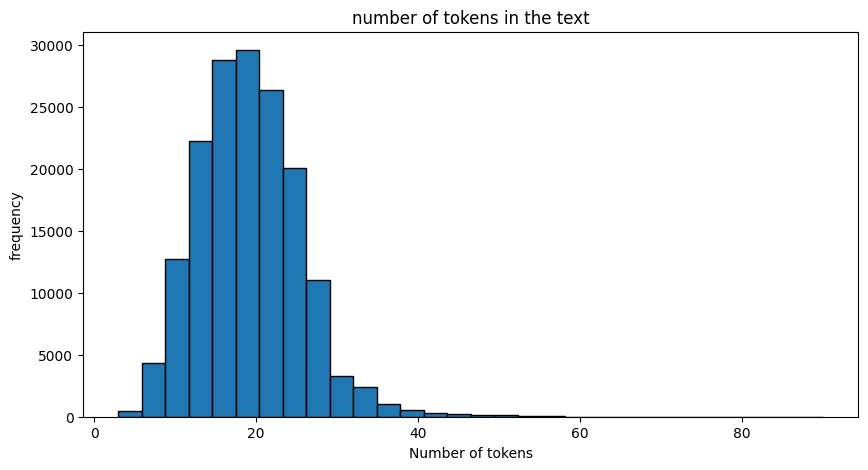

count    163923.000000
mean         19.209458
std           6.438175
min           3.000000
25%          15.000000
50%          19.000000
75%          23.000000
max          90.000000
Name: token_length, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÌè¨ ÌôïÏù∏
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df["token_length"], bins=30, edgecolor='black')
plt.xlabel("Number of tokens")
plt.ylabel("frequency")
plt.title("number of tokens in the text")
plt.show()

# ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂úÎ†•
print(df["token_length"].describe())

In [ ]:
# 60Í∞ú Ïù¥ÏÉÅÏù∏ ÏÉòÌîå Í∞úÏàò Í≥ÑÏÇ∞
num_over_60 = (df["token_length"] >= 60).sum()

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÌÜ†ÌÅ∞ Í∞úÏàòÍ∞Ä 60Í∞ú Ïù¥ÏÉÅÏù∏ ÏÉòÌîå Í∞úÏàò: {num_over_60}")

ÌÜ†ÌÅ∞ Í∞úÏàòÍ∞Ä 60Í∞ú Ïù¥ÏÉÅÏù∏ ÏÉòÌîå Í∞úÏàò: 21


In [ ]:
df

emotion                                               text  label  \
0           Î∂ÑÎÖ∏                          ÏùºÏùÄ Ïôú Ìï¥ÎèÑ Ìï¥ÎèÑ ÎÅùÏù¥ ÏóÜÏùÑÍπå? ÌôîÍ∞Ä ÎÇúÎã§.      0   
1           Î∂ÑÎÖ∏     Ïù¥Î≤à Îã¨Ïóê Îòê Í∏âÏó¨Í∞Ä ÍπéÏòÄÏñ¥! Î¨ºÍ∞ÄÎäî Ïò§Î•¥ÎäîÎç∞ ÏõîÍ∏âÎßå ÏûêÍæ∏ ÍπéÏù¥ÎãàÍπå ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.      0   
2           Î∂ÑÎÖ∏  ÌöåÏÇ¨Ïóê Ïã†ÏûÖÏù¥ Îì§Ïñ¥ÏôîÎäîÎç∞ ÎßêÌà¨Í∞Ä Í±∞Ïä¨Î†§. Í∑∏Îü∞ Ïï†Î•º Îß§Ïùº Î¥êÏïº ÌïúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎãàÍπå Ïä§...      0   
3           Î∂ÑÎÖ∏  ÏßÅÏû•ÏóêÏÑú ÎßâÎÇ¥ÎùºÎäî Ïù¥Ïú†Î°ú ÎÇòÏóêÍ≤åÎßå Ïò®Í∞ñ Ïã¨Î∂ÄÎ¶ÑÏùÑ ÏãúÏºú. ÏùºÎèÑ ÎßéÏùÄ Îç∞ Ï†ïÎßê Î∂ÑÌïòÍ≥† ...      0   
4           Î∂ÑÎÖ∏              ÏñºÎßà Ï†Ñ ÏûÖÏÇ¨Ìïú Ïã†ÏûÖÏÇ¨ÏõêÏù¥ ÎÇòÎ•º Î¨¥ÏãúÌïòÎäî Í≤É Í∞ôÏïÑÏÑú ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.      0   
...        ...                                                ...    ...   
163918      Î∂ÑÎÖ∏                                       ÎßêÌï¥Î¥êÎèÑ ÏÜåÏö©Ïù¥ ÏóÜÏñ¥.      0   
163919      Í∏∞ÏÅ®  Î∂ÄÎ™®ÎãòÍªòÎäî ÏûêÏ£º Ï∞æÏïÑÎµôÎäî Í≤å Ïö∞ÏÑ†Ïùº Í±∞Í≥† ÎÇ®Ìé∏ÏóêÍ≤ê ÌûòÎÇº Ïàò ÏûàÎäî ÎßêÏùÑ ÏûêÏ£º Ìï¥ Ï§Ñ ...      5   
163920      Î∂àÏïà  Ï¢ãÏïÑÌïòÎäî ÎÖ∏ÎûòÎ•º Ìïú Í≥° Îì£Í≥† Í∏∞Î∂ÑÏù¥ ÎÇòÏïÑÏßÑ ÏÉÅÌÉúÏóêÏÑú ÏπúÍµ¨Îì§Í≥º ÎåÄÌôîÎ•º ÌïòÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑ.      1   
163921      Í∏∞ÏÅ®                              Ìï®Íªò Ï†êÏã¨ÎèÑ Î®πÍ≥† ÏπúÌïòÍ≤å ÏßÄÎÇ¥Í≥† ÏûàÏñ¥.      5   
163922      ÎãπÌô©           Ïù∏Ï¶ùÏÉ∑Îßå Ï∞çÍ≥† Í±∞Ïùò Î®πÏßÄ ÏïäÎçîÎùºÍ≥†. ÏùåÏãùÏùÑ Ìï®Î∂ÄÎ°ú ÌïòÎäî Î™®ÏäµÏóê Ïã§ÎßùÌñàÏñ¥.      4   

        token_length  
0                 13  
1                 24  
2                 24  
3                 27  
4                 21  
...              ...  
163918             7  
163919            30  
163920            30  
163921            12  
163922            23  

[163923 rows x 4 columns]

# ÌÜ†ÌÅ∞Ìôî

In [ ]:
model_name = "monologg/koelectra-base-v3-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=60)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/131138 [00:00<?, ? examples/s]

Map:   0%|          | 0/16392 [00:00<?, ? examples/s]

Map:   0%|          | 0/16393 [00:00<?, ? examples/s]

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 131138
})

In [ ]:
train_dataset = train_dataset.remove_columns(["text", "token_type_ids"])
val_dataset = val_dataset.remove_columns(["text", "token_type_ids"])
test_dataset = test_dataset.remove_columns(["text", "token_type_ids"])

In [ ]:
train_dataset

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 131138
})

# Î™®Îç∏ ÌïôÏäµ

In [ ]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

pytorch_model.bin:   0%|          | 0.00/452M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install evaluate

model.safetensors:   0%|          | 0.00/452M [00:00<?, ?B/s]

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
# ÌïôÏäµ ÏÑ§Ï†ï

from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
import evaluate

f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def custom_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1_score = f1_metric.compute(predictions=preds, references=labels, average="micro")["f1"]
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)["accuracy"]
    precision = precision_metric.compute(predictions=preds, references=labels, average="micro")["precision"]
    recall = recall_metric.compute(predictions=preds, references=labels, average="micro")["recall"]

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1_score,
    }


training_args = TrainingArguments(
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=5e-5,
    max_grad_norm=1,
    num_train_epochs=5,
    evaluation_strategy='steps',
    logging_strategy='steps',
    logging_steps=1000,
    logging_dir='/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·Ñâ·Öµ·Ü∑·ÑÖ·Öµ·Ñâ·Ö°·Üº·ÑÉ·Ö°·Ü∑ ·Ñé·Ö¢·Ü∫·Ñá·Ö©·Ü∫/KoELECTRA/logs',
    save_strategy='steps',
    save_steps=1000,
    output_dir='/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·Ñâ·Öµ·Ü∑·ÑÖ·Öµ·Ñâ·Ö°·Üº·ÑÉ·Ö°·Ü∑ ·Ñé·Ö¢·Ü∫·Ñá·Ö©·Ü∫/KoELECTRA/',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
    greater_is_better=True,
    report_to='tensorboard'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=custom_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-5a19b76403bb>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

TrainOutput(global_step=14000, training_loss=1.2007105146135604, metrics={'train_runtime': 5379.2129, 'train_samples_per_second': 121.893, 'train_steps_per_second': 3.81, 'total_flos': 1.38110514046056e+16, 'train_loss': 1.2007105146135604, 'epoch': 3.4154671871188094})

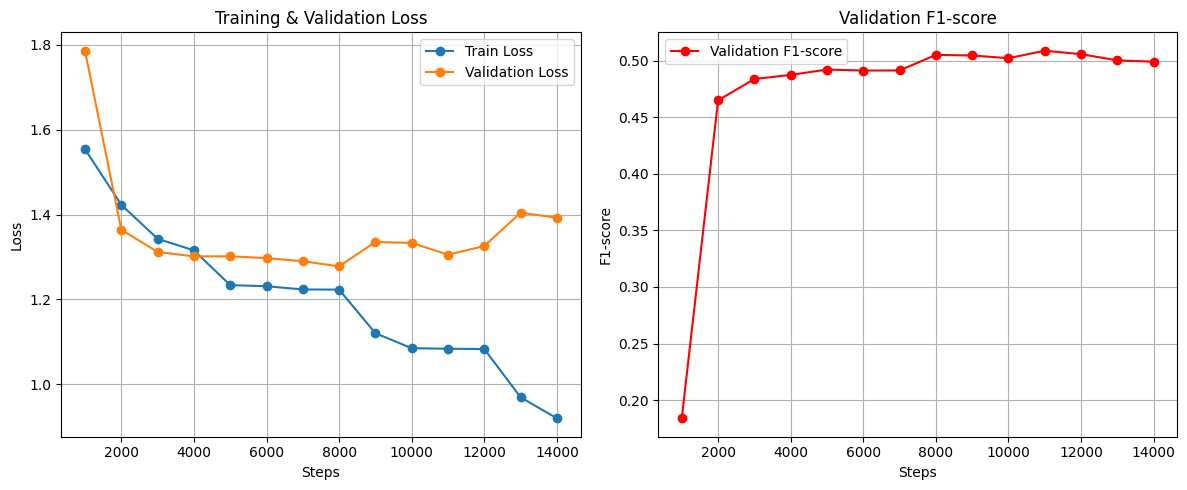

In [ ]:
import matplotlib.pyplot as plt

# TrainerÏùò Î°úÍ∑∏ ÌûàÏä§ÌÜ†Î¶¨ÏóêÏÑú ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
history = trainer.state.log_history

# loss Î∞è f1-score Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
train_losses = []
eval_losses = []
eval_f1_scores = []
steps = []

for log in history:
    if 'loss' in log:  # Training loss
        train_losses.append(log['loss'])
        steps.append(log['step'])
    if 'eval_loss' in log:  # Validation loss
        eval_losses.append(log['eval_loss'])
    if 'eval_f1' in log:  # Validation f1-score
        eval_f1_scores.append(log['eval_f1'])

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 5))

# Loss Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
plt.plot(steps[:len(train_losses)], train_losses, label="Train Loss", marker='o')
plt.plot(steps[:len(eval_losses)], eval_losses, label="Validation Loss", marker='o')
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid()

# F1-score Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(steps[:len(eval_f1_scores)], eval_f1_scores, label="Validation F1-score", marker='o', color='red')
plt.xlabel("Steps")
plt.ylabel("F1-score")
plt.title("Validation F1-score")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
best_checkpoint = trainer.state.best_model_checkpoint
print(f"Best model checkpoint: {best_checkpoint}")

Best model checkpoint: /content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·Ñâ·Öµ·Ü∑·ÑÖ·Öµ·Ñâ·Ö°·Üº·ÑÉ·Ö°·Ü∑ ·Ñé·Ö¢·Ü∫·Ñá·Ö©·Ü∫/KoELECTRA/checkpoint-11000


In [ ]:
# Î™®Îç∏ Ï†ÄÏû• (Trainer Î∞©Ïãù)
trainer.save_model("/content/drive/MyDrive/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·Ñâ·Öµ·Ü∑·ÑÖ·Öµ·Ñâ·Ö°·Üº·ÑÉ·Ö°·Ü∑ ·Ñé·Ö¢·Ü∫·Ñá·Ö©·Ü∫/KoELECTRA/best_model")

# Î™®Îç∏ ÌèâÍ∞Ä

In [ ]:
predictions = trainer.predict(test_dataset)
print(predictions.metrics)

{'test_loss': 1.303816318511963, 'test_accuracy': 0.5101567742329043, 'test_precision': 0.5101567742329043, 'test_recall': 0.5101567742329043, 'test_f1': 0.5101567742329043, 'test_runtime': 54.6619, 'test_samples_per_second': 299.898, 'test_steps_per_second': 9.385}


In [ ]:
df

emotion                                               text  label  \
0           Î∂ÑÎÖ∏                          ÏùºÏùÄ Ïôú Ìï¥ÎèÑ Ìï¥ÎèÑ ÎÅùÏù¥ ÏóÜÏùÑÍπå? ÌôîÍ∞Ä ÎÇúÎã§.      0   
1           Î∂ÑÎÖ∏     Ïù¥Î≤à Îã¨Ïóê Îòê Í∏âÏó¨Í∞Ä ÍπéÏòÄÏñ¥! Î¨ºÍ∞ÄÎäî Ïò§Î•¥ÎäîÎç∞ ÏõîÍ∏âÎßå ÏûêÍæ∏ ÍπéÏù¥ÎãàÍπå ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.      0   
2           Î∂ÑÎÖ∏  ÌöåÏÇ¨Ïóê Ïã†ÏûÖÏù¥ Îì§Ïñ¥ÏôîÎäîÎç∞ ÎßêÌà¨Í∞Ä Í±∞Ïä¨Î†§. Í∑∏Îü∞ Ïï†Î•º Îß§Ïùº Î¥êÏïº ÌïúÎã§Í≥† ÏÉùÍ∞ÅÌïòÎãàÍπå Ïä§...      0   
3           Î∂ÑÎÖ∏  ÏßÅÏû•ÏóêÏÑú ÎßâÎÇ¥ÎùºÎäî Ïù¥Ïú†Î°ú ÎÇòÏóêÍ≤åÎßå Ïò®Í∞ñ Ïã¨Î∂ÄÎ¶ÑÏùÑ ÏãúÏºú. ÏùºÎèÑ ÎßéÏùÄ Îç∞ Ï†ïÎßê Î∂ÑÌïòÍ≥† ...      0   
4           Î∂ÑÎÖ∏              ÏñºÎßà Ï†Ñ ÏûÖÏÇ¨Ìïú Ïã†ÏûÖÏÇ¨ÏõêÏù¥ ÎÇòÎ•º Î¨¥ÏãúÌïòÎäî Í≤É Í∞ôÏïÑÏÑú ÎÑàÎ¨¥ ÌôîÍ∞Ä ÎÇò.      0   
...        ...                                                ...    ...   
163918      Î∂ÑÎÖ∏                                       ÎßêÌï¥Î¥êÎèÑ ÏÜåÏö©Ïù¥ ÏóÜÏñ¥.      0   
163919      Í∏∞ÏÅ®  Î∂ÄÎ™®ÎãòÍªòÎäî ÏûêÏ£º Ï∞æÏïÑÎµôÎäî Í≤å Ïö∞ÏÑ†Ïùº Í±∞Í≥† ÎÇ®Ìé∏ÏóêÍ≤ê ÌûòÎÇº Ïàò ÏûàÎäî ÎßêÏùÑ ÏûêÏ£º Ìï¥ Ï§Ñ ...      5   
163920      Î∂àÏïà  Ï¢ãÏïÑÌïòÎäî ÎÖ∏ÎûòÎ•º Ìïú Í≥° Îì£Í≥† Í∏∞Î∂ÑÏù¥ ÎÇòÏïÑÏßÑ ÏÉÅÌÉúÏóêÏÑú ÏπúÍµ¨Îì§Í≥º ÎåÄÌôîÎ•º ÌïòÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑ.      1   
163921      Í∏∞ÏÅ®                              Ìï®Íªò Ï†êÏã¨ÎèÑ Î®πÍ≥† ÏπúÌïòÍ≤å ÏßÄÎÇ¥Í≥† ÏûàÏñ¥.      5   
163922      ÎãπÌô©           Ïù∏Ï¶ùÏÉ∑Îßå Ï∞çÍ≥† Í±∞Ïùò Î®πÏßÄ ÏïäÎçîÎùºÍ≥†. ÏùåÏãùÏùÑ Ìï®Î∂ÄÎ°ú ÌïòÎäî Î™®ÏäµÏóê Ïã§ÎßùÌñàÏñ¥.      4   

        token_length  
0                 13  
1                 24  
2                 24  
3                 27  
4                 21  
...              ...  
163918             7  
163919            30  
163920            30  
163921            12  
163922            23  

[163923 rows x 4 columns]

In [ ]:
{"Î∂ÑÎÖ∏": 0, "Î∂àÏïà": 1, "ÏÉÅÏ≤ò": 2, "Ïä¨Ìîî": 3, "ÎãπÌô©": 4, "Í∏∞ÏÅ®": 5}

In [ ]:
import torch

# ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÎîîÎ∞îÏù¥Ïä§ ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú Ï≤òÏùå 10Í∞ú ÌÖçÏä§Ìä∏ Ï∂îÏ∂ú
texts = df["text"][:10].tolist()

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï Î∞è ÏûÖÎ†• ÌÖêÏÑú Î≥ÄÌôò (ÎîîÎ∞îÏù¥Ïä§Î°ú Ïù¥Îèô)
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(device)

# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Î≥ÄÍ≤Ω
model.eval()

# ÏòàÏ∏° ÏàòÌñâ
with torch.no_grad():
    outputs = model(**inputs)

# Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÅ¥ÎûòÏä§ ÏÑ†ÌÉù
predicted_labels = torch.argmax(outputs.logits, dim=-1).tolist()

# Î†àÏù¥Î∏î Îß§Ìïë
label_map = {0: "Î∂ÑÎÖ∏", 1: "Î∂àÏïà", 2: "ÏÉÅÏ≤ò", 3: "Ïä¨Ìîî", 4: "ÎãπÌô©", 5: "Í∏∞ÏÅ®"}
predicted_emotions = [label_map[label] for label in predicted_labels]

# Í≤∞Í≥º Ï∂úÎ†•
print("ÏòàÏ∏°Îêú Í∞êÏ†ï Í≤∞Í≥º:")
for i, emotion in enumerate(predicted_emotions):
    print(f"{i+1}. {emotion}")

ÏòàÏ∏°Îêú Í∞êÏ†ï Í≤∞Í≥º:
1. Î∂ÑÎÖ∏
2. Î∂ÑÎÖ∏
3. Î∂ÑÎÖ∏
4. Î∂ÑÎÖ∏
5. Î∂ÑÎÖ∏
6. Ïä¨Ìîî
7. Î∂ÑÎÖ∏
8. Í∏∞ÏÅ®
9. Í∏∞ÏÅ®
10. Í∏∞ÏÅ®


In [ ]:
df['emotion'][:10]

0    Î∂ÑÎÖ∏
1    Î∂ÑÎÖ∏
2    Î∂ÑÎÖ∏
3    Î∂ÑÎÖ∏
4    Î∂ÑÎÖ∏
5    Î∂ÑÎÖ∏
6    Î∂ÑÎÖ∏
7    Í∏∞ÏÅ®
8    Î∂àÏïà
9    Í∏∞ÏÅ®
Name: emotion, dtype: object